1. Datos sismos

In [1]:
import sys
import os

In [ ]:
# Añadir la ruta del script al path
SCRIPT_PATH = os.path.join("..", "scripts")
sys.path.append(SCRIPT_PATH)

from data_loader import cargar_catalogo_sismico

# Ruta del archivo de datos
DATA_PATH = os.path.join("..", "data", "cat_origen_2012-jul2025.txt")

# Cargar el catálogo sísmico
catalogo = cargar_catalogo_sismico(DATA_PATH)

# Explorar los datos
if catalogo is not None:
    display(catalogo.head())  # Primeras 5 filas
    catalogo.info()           # Información general


In [ ]:
catalogo = cargar_catalogo_sismico("../data/cat_origen_2012-jul2025.txt")
display(catalogo)



Cargando catálogo sísmico desde:
../data/cat_origen_2012-jul2025.txt

 Datos cargados correctamente.
Filas cargadas: 3



,fecha,hora,latitud,longitud,profundidad,magnitud,ubicacion
0,2012-01-05,03:57,-0.23,-78.52,15.0,4.8,Ambato
1,2016-04-16,18:30,-1.67,-79.01,10.5,5.1,Guayaquil
2,2017-03-05,01:45,-2.68,-79.01,10.9,6.1,Cuenca


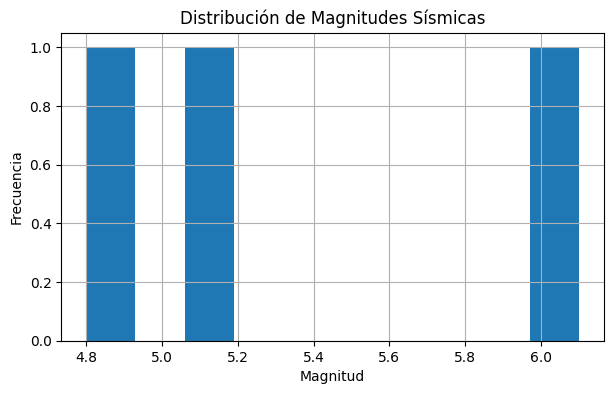

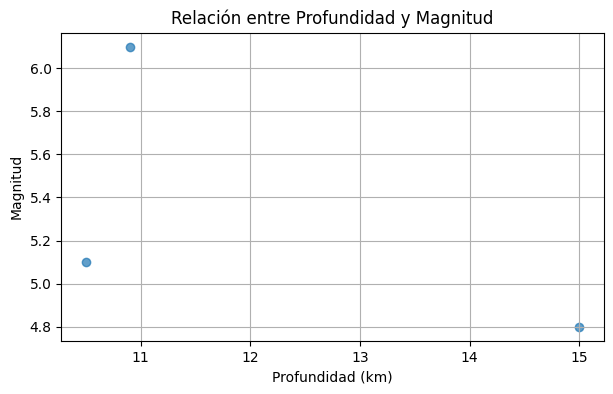

In [ ]:
import matplotlib.pyplot as plt

# Histograma de magnitudes
plt.figure(figsize=(7,4))
plt.hist(catalogo["magnitud"], bins=10)
plt.title("Distribución de Magnitudes Sísmicas")
plt.xlabel("Magnitud")
plt.ylabel("Frecuencia")
plt.grid(True)
plt.show()


# Gráfico de dispersión (profundidad vs magnitud)
plt.figure(figsize=(7,4))
plt.scatter(catalogo["profundidad"], catalogo["magnitud"], alpha=0.7)
plt.title("Relación entre Profundidad y Magnitud")
plt.xlabel("Profundidad (km)")
plt.ylabel("Magnitud")
plt.grid(True)
plt.show()
